In [195]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [31]:
BnkDta = pd.read_csv('BankDataFinal.csv')

In [32]:
BnkDta.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,day_interval,age,balance,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0.519481,0.092259,0.053070,0.0,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0.337662,0.073067,0.030704,0.0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0.194805,0.072822,0.015453,0.0,0.0,0.0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0.376623,0.086476,0.018707,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.194805,0.072812,0.040260,0.0,0.0,0.0,0


After scaling the data, we have all of our values normalized within the range of [0,1] 

In [33]:
BnkDta.describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,day_interval,age,balance,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,...,0.555838,0.160226,1.986110,0.297873,0.085171,0.052494,0.028449,0.047245,0.002110,0.116985
std,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,...,0.496878,0.366820,0.770119,0.137906,0.027643,0.052364,0.049968,0.114827,0.008376,0.321406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.194805,0.073457,0.020943,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.272727,0.076871,0.036600,0.016129,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.389610,0.085768,0.064864,0.032258,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
BnkDta.isnull().sum()

job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
month                  0
default                0
housing                0
loan                   0
day_interval           0
age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
dtype: int64

In [35]:
X = BnkDta[BnkDta.columns.difference(['y'])]
y = BnkDta['y']

In [36]:
X.columns

Index(['age', 'balance', 'campaign', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_interval', 'default', 'duration',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'loan', 'marital_divorced',
       'marital_married', 'marital_single', 'month', 'pdays',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'previous'],
      dtype='object')

# Check the impcat of stratification on the prediction performance

In [37]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
from sklearn.naive_bayes import GaussianNB

metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index = metric_names, columns=['Random-CV', 'Stratified-CV']) 
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
clf = GaussianNB()
for metric in metric_names:
    score1 = cross_val_score(clf, X, y, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X, y, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]


In [38]:
scores_df

,Random-CV,Stratified-CV
f1,0.257591,0.308646
roc_auc,0.697343,0.716315
average_precision,0.25492,0.318739
accuracy,0.62138,0.729598
precision,0.235151,0.322809
recall,0.599949,0.484591


# Data Spliltting (with Stratification)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=0)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 37)
(13564, 37)
(31647,)
(13564,)


# Data Modeling

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [50]:
logreg = LogisticRegression(penalty='l1',C=100)
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.90


In [43]:
preds_LR = logreg.predict(X_test)
# --classification report --
print(classification_report(y_test, y_preds, labels=[0,1]))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     11977
          1       0.65      0.33      0.43      1587

avg / total       0.88      0.90      0.89     13564



From the previous report, we can see that the true positive rate is 0.65 which can be explained by the imbalance of our classes!

In [44]:
roc_LR = roc_auc_score(y_test,preds_LR)
print(roc_LR)

0.6509653111122089


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
Dt_clf= DecisionTreeClassifier(max_depth=26, random_state=5)
Dt_clf.fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(Dt_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(Dt_clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [100]:
preds_DT = Dt_clf.predict(X_test)
# --classification report --
print(classification_report(y_test, preds_DT, labels=[0,1]))

             precision    recall  f1-score   support

          0       0.93      0.92      0.93     11977
          1       0.46      0.48      0.46      1587

avg / total       0.87      0.87      0.87     13564



In [101]:
roc_DT = roc_auc_score(y_test,preds_DT)
print(roc_DT)

0.6998578824073592


# K-Nearest Neighbors

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.89


In [147]:
preds_knn = knn.predict(X_test)
# --classification report --
print(classification_report(y_test, preds_knn, labels=[0,1]))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94     11977
          1       0.53      0.29      0.37      1587

avg / total       0.87      0.89      0.87     13564



In [148]:
roc_knn = roc_auc_score(y_test,preds_knn)
print(roc_knn)

0.6267788045128926


# Gaussian Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.81
Accuracy of GNB classifier on test set: 0.81


In [152]:
preds_gnb = gnb.predict(X_test)

In [153]:
roc_gnb = roc_auc_score(y_test, preds_gnb)
print(roc_gnb)

0.6942471495066237


# Support Vector Machine

In [163]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.89


In [164]:
preds_svm = svm.predict(X_test)

In [165]:
roc_svm = roc_auc_score(y_test, preds_svm)
print(roc_svm)

0.5889317421508216


# Neural Networks_Multi-layer Perceptron

In [172]:
from sklearn.neural_network import MLPClassifier
#MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2),random_state=1)
MLP = MLPClassifier()

In [173]:
MLP.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [174]:
preds_MLP = MLP.predict(X_test)

In [175]:
print('Accuracy of ANN_MLP classifier on training set: {:.2f}'.format(MLP.score(X_train, y_train)))
print('Accuracy of ANN_MLP classifier on test set: {:.2f}'.format(MLP.score(X_test, y_test)))

Accuracy of ANN_MLP classifier on training set: 0.91
Accuracy of ANN_MLP classifier on test set: 0.90


In [176]:
roc_MLP = roc_auc_score(y_test,preds_MLP)
print(roc_MLP)

0.6941031274025058


# Ensamble Methods

In [178]:
from xgboost import XGBClassifier

In [179]:
# fit model no training data
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [181]:
# make predictions for test data
preds_XGB = XGB.predict(X_test)


In [182]:
print('Accuracy of XGB classifier on training set: {:.2f}'.format(XGB.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(XGB.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 0.91
Accuracy of XGB classifier on test set: 0.90


In [183]:
roc_XGB = roc_auc_score(y_test,preds_XGB)
print(roc_XGB)

0.6692277084954732


# Comparing the accuracy of ML models

In [185]:
accuracy=[roc_LR ,roc_DT ,roc_knn , roc_gnb ,roc_svm, roc_MLP, roc_XGB]
accuracy

[0.6509653111122089,
 0.5792483798105159,
 0.6267788045128926,
 0.6942471495066237,
 0.5889317421508216,
 0.6941031274025058,
 0.6692277084954732]

In [189]:
models= ["LR", "DT", "KNN", "NB", "SVM","ANN","XGboost"]
models

['LR', 'DT', 'KNN', 'NB', 'SVM', 'ANN', 'XGboost']

In [192]:
d = {'model': models,'accuracy': accuracy}

In [193]:
Performane = pd.DataFrame(data=d)
Performane

,model,accuracy
0,LR,0.650965
1,DT,0.579248
2,KNN,0.626779
3,NB,0.694247
4,SVM,0.588932
5,ANN,0.694103
6,XGboost,0.669228


Text(0.5,1,'Comparing the Accuracy of Different ML Models')

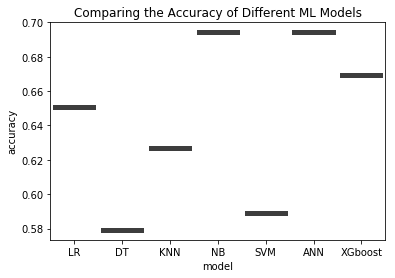

In [196]:
ax=sns.boxplot(x='model', y='accuracy', data=Performane,linewidth=5)
ax.set_title("Comparing the Accuracy of Different ML Models")